In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from skimage import io, img_as_ubyte

import torch
from utils.uce import uceloss

import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

In [2]:
to_eval = 'OCT'

if to_eval == 'X-ray':
    # X-ray
    run_1 = np.load("../logs/1615973642/save.npz", allow_pickle=True)
    run_2 = np.load("../logs/1615986574/save.npz", allow_pickle=True)
    run_3 = np.load("../logs/1615973649/save.npz", allow_pickle=True)
elif to_eval == 'US':
    # US
    run_1 = np.load("/media/fastdata/laves/unsure/1594187378/save.npz", allow_pickle=True)
    run_2 = np.load("/media/fastdata/laves/unsure/1594204039/save.npz", allow_pickle=True)
    run_3 = np.load("/media/fastdata/laves/unsure/1594221451/save.npz", allow_pickle=True)
elif to_eval == 'OCT':
    # OCT
    run_1 = np.load("../logs/1615986077/save.npz", allow_pickle=True)
    run_2 = np.load("../logs/1615974698/save.npz", allow_pickle=True)
    run_3 = np.load("../logs/1616003797/save.npz", allow_pickle=True)
else:
    assert False

# PSNR

In [3]:
psnrs_1 = run_1['psnrs'].flat[0]
psnrs_2 = run_2['psnrs'].flat[0]
psnrs_3 = run_3['psnrs'].flat[0]

In [4]:
# take last 100 reconstructions from 3 runs to compute mean and std
for s in ['dip', 'sgld', 'mcdip', 'mfvi']:
    data = np.mean([np.array(psnrs_1[s])[-100:,2], np.array(psnrs_2[s])[-100:,2], np.array(psnrs_3[s])[-100:,2]], axis=1)
    print(f'{s}, $ {np.round(np.mean(data), 2)} \pm {np.round(np.std(data), 2)} $')

dip, $ 22.96 \pm 0.05 $
sgld, $ 23.71 \pm 0.13 $
mcdip, $ 28.41 \pm 0.04 $
mfvi, $ 29.34 \pm 0.02 $


In [5]:
# early stopping
for s in ['dip', 'sgld', 'mcdip', 'mfvi']:
    data = [np.array(psnrs_1[s])[:,2].max(), np.array(psnrs_2[s])[:,2].max(), np.array(psnrs_3[s])[:,2].max()]
    print(f'{s}, $ {np.round(np.mean(data), 2)} \pm {np.round(np.std(data), 2)} $')

dip, $ 29.81 \pm 0.03 $
sgld, $ 29.83 \pm 0.04 $
mcdip, $ 29.29 \pm 0.04 $
mfvi, $ 29.4 \pm 0.04 $


# SSIM

In [6]:
ssims_1 = run_1['ssims'].flat[0]
ssims_2 = run_2['ssims'].flat[0]
ssims_3 = run_3['ssims'].flat[0]

In [7]:
# take last 100 reconstructions from 3 runs to compute mean and std
for s in ['dip', 'sgld', 'sgldnll', 'mcdip']:
    data = np.mean([np.array(ssims_1[s])[-100:,2], np.array(ssims_1[s])[-100:,2], np.array(ssims_1[s])[-100:,2]], axis=1)
    print(f'{s}, $ {np.round(np.mean(data), 3)} \pm {np.round(np.std(data), 4)} $')

dip, $ 0.625 \pm 0.0 $
sgld, $ 0.631 \pm 0.0 $
sgldnll, $ 0.686 \pm 0.0 $
mcdip, $ 0.922 \pm 0.0 $


In [8]:
# early stopping
for s in ['dip', 'sgld', 'sgldnll', 'mcdip']:
    data = [np.array(ssims_1[s])[:,2].max(), np.array(ssims_1[s])[:,2].max(), np.array(ssims_1[s])[:,2].max()]
    print(f'{s}, $ {np.round(np.mean(data), 3)} \pm {np.round(np.std(data), 4)} $')

dip, $ 0.915 \pm 0.0 $
sgld, $ 0.917 \pm 0.0 $
sgldnll, $ 0.912 \pm 0.0 $
mcdip, $ 0.923 \pm 0.0 $


# Figures

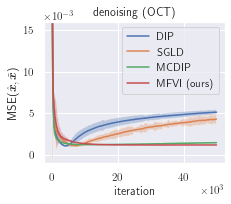

In [6]:
fig, ax0 = plt.subplots(1, 1, figsize=(3.5, 3))

losses_1 = run_1['mse_gt'].flat[0]
losses_2 = run_2['mse_gt'].flat[0]
losses_3 = run_3['mse_gt'].flat[0]

for (key_1, loss_1), (key_2, loss_2), (key_3, loss_3) in zip(losses_1.items(), losses_2.items(), losses_3.items()):
    data = np.array([loss_1, loss_2, loss_3])
    loss = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    label=key_1.upper()
    label = label + " (ours)" if label == 'MFVI' else label
    ax0.plot(range(len(loss))[::100], loss[::100], label=label)
    ax0.fill_between(range(len(loss))[::100], loss[::100]+5*std[::100], loss[::100]-5*std[::100], alpha=0.3)
    ax0.set_title(f"denoising ({to_eval})")
    ax0.set_xlabel('iteration')
    ax0.set_ylabel(r'MSE($\hat{\bm{x}}, \tilde{\bm{x}}$)')
    ax0.set_ylim(-0.001,0.016)
    ax0.grid(True)
    ax0.legend()

ax0.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))
ax0.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f'mse_{to_eval}.pdf', bbox_inches='tight')

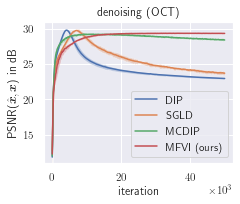

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

for (key_1, psnr_1), (key_2, psnr_2), (key_3, psnr_3) in zip(psnrs_1.items(), psnrs_2.items(), psnrs_3.items()):
    data = np.array([psnr_1[:,-1], psnr_2[:,-1], psnr_3[:,-1]])
    mean = np.mean(data, axis=0)
    std = 2*np.std(data, axis=0)
    label=key_1.upper()
    label = label + " (ours)" if label == 'MFVI' else label
    ax.plot(range(len(mean))[::100], mean[::100], label=label)
    ax.fill_between(range(len(mean))[::100], mean[::100]+std[::100], mean[::100]-std[::100], alpha=0.3)
    ax.set_title(f"denoising ({to_eval})")
    ax.set_xlabel('iteration')
    ax.set_ylabel(r'PSNR($\hat{\bm{x}}, \bm{x}$) in dB')
    ax.set_ylim([11, 31])
    ax.legend()
    
ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f"psnr_{to_eval}.pdf", bbox_inches='tight')

NameError: name 'ssims_1' is not defined

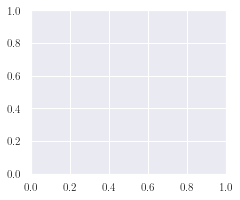

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

for (key_1, ssim_1), (key_2, ssim_2), (key_3, ssim_3) in zip(ssims_1.items(), ssims_2.items(), ssims_3.items()):
    data = np.mean(np.array([ssim_1, ssim_2, ssim_3]), axis=0)
    ax.plot(range(len(data[:,2]))[::100], data[:,2][::100], label=key_1.upper())
    ax.set_title(to_eval)
    ax.set_xlabel('iteration')
    ax.set_ylabel(r'SSIM($\hat{\bm{x}}, \bm{x}$)')
    ax.legend()
    
ax.ticklabel_format(axis='x', style='sci', scilimits=(3, 3))

fig.tight_layout()
fig.savefig(f"ssim_{to_eval}.pdf", bbox_inches='tight')

# Reconstructed images

In [9]:
## after convergence

recons_1 = run_1['recons'].flat[0]

for key_1, recon_1 in recons_1.items():
    io.imsave(f'recon_{to_eval}_{key_1}.png', img_as_ubyte(recon_1[-1][0]))

In [10]:
## with early stopping

recons_1 = run_1['recons'].flat[0]

for key_1, recon_1 in recons_1.items():
    idx_argmax = np.argmax(np.array(run_1['psnrs'].flat[0][key_1])[:,2])
    idx_argmax = idx_argmax // 100  # things were saved only every 100 iteration
    io.imsave(f'recon_{to_eval}_{key_1}_earlystop.png', img_as_ubyte(recon_1[idx_argmax][0]))

# UCE

In [11]:
img_noisy_np = run_1['noisy_img']

## MCDIP

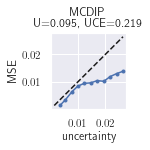

In [12]:
recon_1 = recons_1['mcdip'][-1]
uncert_1 = run_1['uncerts'].flat[0]['mcdip'][-1]
uncert_ale_1 = run_1['uncerts_ale'].flat[0]['mcdip'][-1]

errs = torch.tensor(img_noisy_np)-torch.tensor(recon_1)

uncerts_epi = torch.tensor(uncert_1)
uncerts_ale = torch.tensor(uncert_ale_1)
uncerts = uncerts_epi + uncerts_ale
uce, _, _, _ = uceloss(errs**2, uncerts, n_bins=15)
_, err, uncert, _ = uceloss(errs**2, uncerts, n_bins=15, outlier=1e-3)

fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.25))
max_val = np.max([err.max(), uncert.max()])
min_val = np.min([err.min(), uncert.min()])
ax.plot([min_val, max_val], [min_val, max_val], 'k--')
ax.plot(uncert, err, marker='.')
ax.set_ylabel(r'MSE')
ax.set_xlabel(r'uncertainty')
ax.set_aspect(1)
fig.tight_layout()

ax.set_title(f'MCDIP\nU={uncerts.mean().sqrt().item():.3f}, UCE={uce.item()*100:.3f}')
fig.tight_layout()
fig.savefig(f'calib_mcdip_{to_eval}.pdf', bbox_inches='tight')

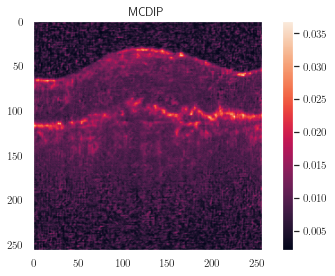

In [13]:
## save uncert map

plt.imshow(uncerts[0].numpy())
plt.grid(False)
plt.colorbar()
plt.title('MCDIP')
plt.tight_layout()
plt.savefig(f'uncert_map_{to_eval}_mcdip.pdf', bbox_inches='tight')